# Online Transactions Fraud Detection


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from imblearn.under_sampling import RandomUnderSampler

# Reading Data from CSV File

### File Name:
- **Online_Fraud_Data.csv**

In [4]:
Data = pd.read_csv('data/Online_Fraud_Data.csv')

In [5]:
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Dataset Overview

The dataset contains **6,362,620 rows** and **8 columns**. Below are the names of the features (columns):

1. **step** - The time step of the transaction.
2. **type** - The type of the transaction (e.g., PAYMENT, CASH_IN, etc.).
3. **amount** - The amount of the transaction.
4. **oldbalanceOrg** - The balance before the transaction for the sender.
5. **newbalanceOrig** - The balance after the transaction for the sender.
6. **oldbalanceDest** - The balance before the transaction for the recipient.
7. **newbalanceDest** - The balance after the transaction for the recipient.
8. **isFraud** - A binary label indicating whether the transaction was fraudulent (`1`) or not (`0`).

This dataset is used for detecting fraudulent transactions in an online system.


In [6]:
Data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Checking for any NULL values:

In [7]:
Data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Data Cleaning: Dropping Unnecessary Columns

In this step, we remove the following columns from the dataset as they are not needed for our analysis:

1. **nameOrig** - The name of the sender (originating account).
2. **nameDest** - The name of the recipient (destination account).
3. **isFlaggedFraud** - A flag indicating whether the transaction was previously flagged as fraud (this column is redundant for our analysis). 

In [8]:
Data.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1, inplace=True)

# Encoding Categorical Feature

We encode the **'type'** column, which is categorical, into numerical values using **LabelEncoder** from scikit-learn.

In [9]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
Data['type'] = encoder.fit_transform(Data['type'])
Data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1


# Visualizing Class Distribution

We visualize the distribution of the **'isFraud'** column using a pie chart. The chart shows the percentage of fraudulent vs non-fraudulent transactions in the dataset.

- **Not Fraud**: Transactions that are not fraudulent.
- **Fraud**: Transactions that are fraudulent.

([<matplotlib.patches.Wedge at 0x1cff1473020>,
 [Text(-1.099990955625572, 0.004460666087110192, 'Not Fraud'),
  Text(1.0999909559371663, -0.004460589247970448, 'Fraud')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.9%'),
  Text(0.599995066874818, -0.002433048680711153, '0.1%')])

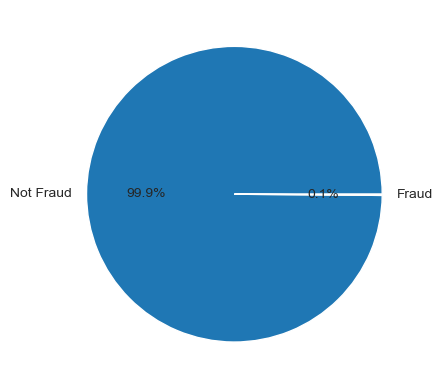

In [10]:
class_dist = Data['isFraud'].value_counts()
plt.pie(class_dist,labels = ['Not Fraud','Fraud'],autopct='%1.1f%%')

In [11]:
Vals = Data.drop('isFraud', axis = 1)
Ans = Data['isFraud']

# Applying Random Undersampling

As classes were too much imbalance so we used **RandomUnderSampler** to address class imbalance by randomly undersampling the majority class (non-fraudulent transactions) to match the number of fraudulent transactions. This helps balance the dataset for model training.


In [12]:
Vals, Ans = RandomUnderSampler(random_state=42).fit_resample(Vals, Ans)

In [13]:
Balanced_Data = pd.concat([Vals, Ans], axis = 1)
Balanced_Data.reset_index(drop = True,inplace = True)

# Dropping Duplicate Rows

We remove any duplicate rows from **T_data** to ensure the dataset contains only unique entries.


In [14]:
Balanced_Data.drop_duplicates(inplace = True)

# Correlation Heatmap

We generate a correlation heatmap of the **Balanced_Data** to visualize the relationships between different numerical features. The heatmap uses the **'crest'** color map and annotates the correlation values on the plot.

<Axes: >

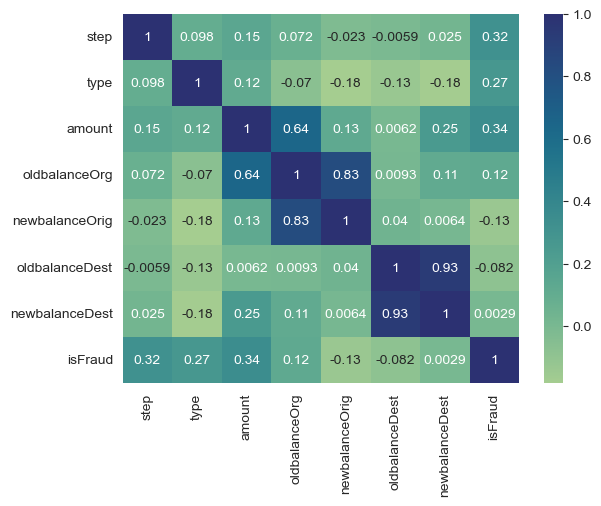

In [15]:
sns.heatmap(Balanced_Data.corr(), annot=True, cmap = 'crest')

# Boxplot for Data Distribution

We create a **boxplot** to visualize the distribution and detect any potential outliers in the **Balanced_Data**. The plot is displayed with a size of 12x6 inches.

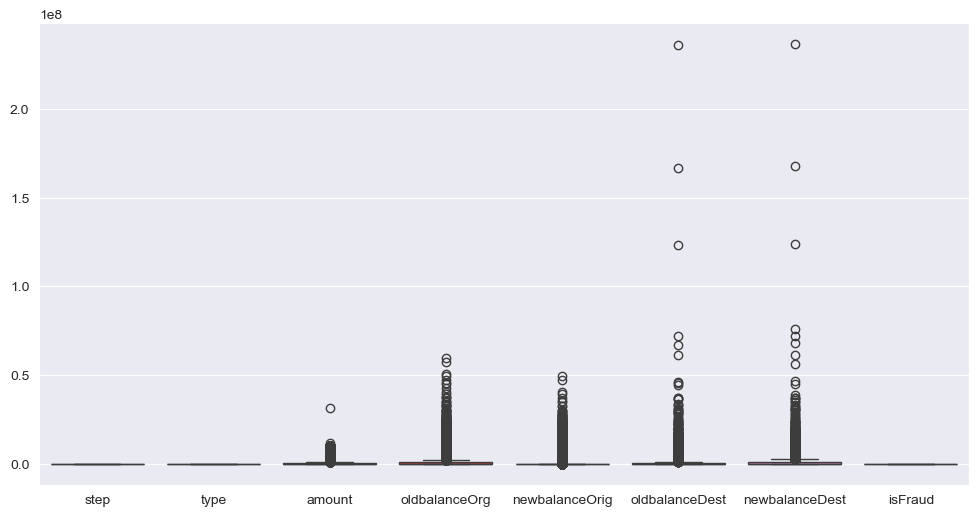

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data = Balanced_Data)
plt.show()

# Visualizing Feature Distributions

We plot **histograms** for all numerical features in the **Balanced_Data** to observe their distributions.

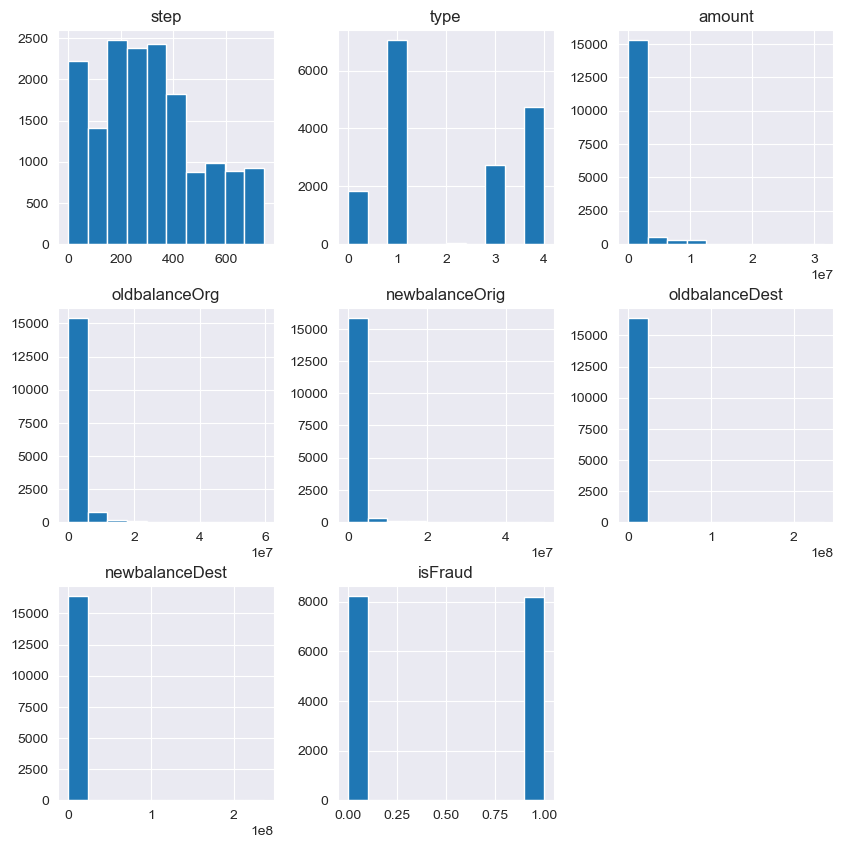

In [17]:
Balanced_Data.hist(figsize = (10,10))
plt.show()

# Pairplot of Features

We create a **pairplot** to visualize the relationships between features in the **Balanced_Data**, colored by the **'isFraud'** label. This helps in understanding how the features correlate with fraud vs. non-fraud transactions.

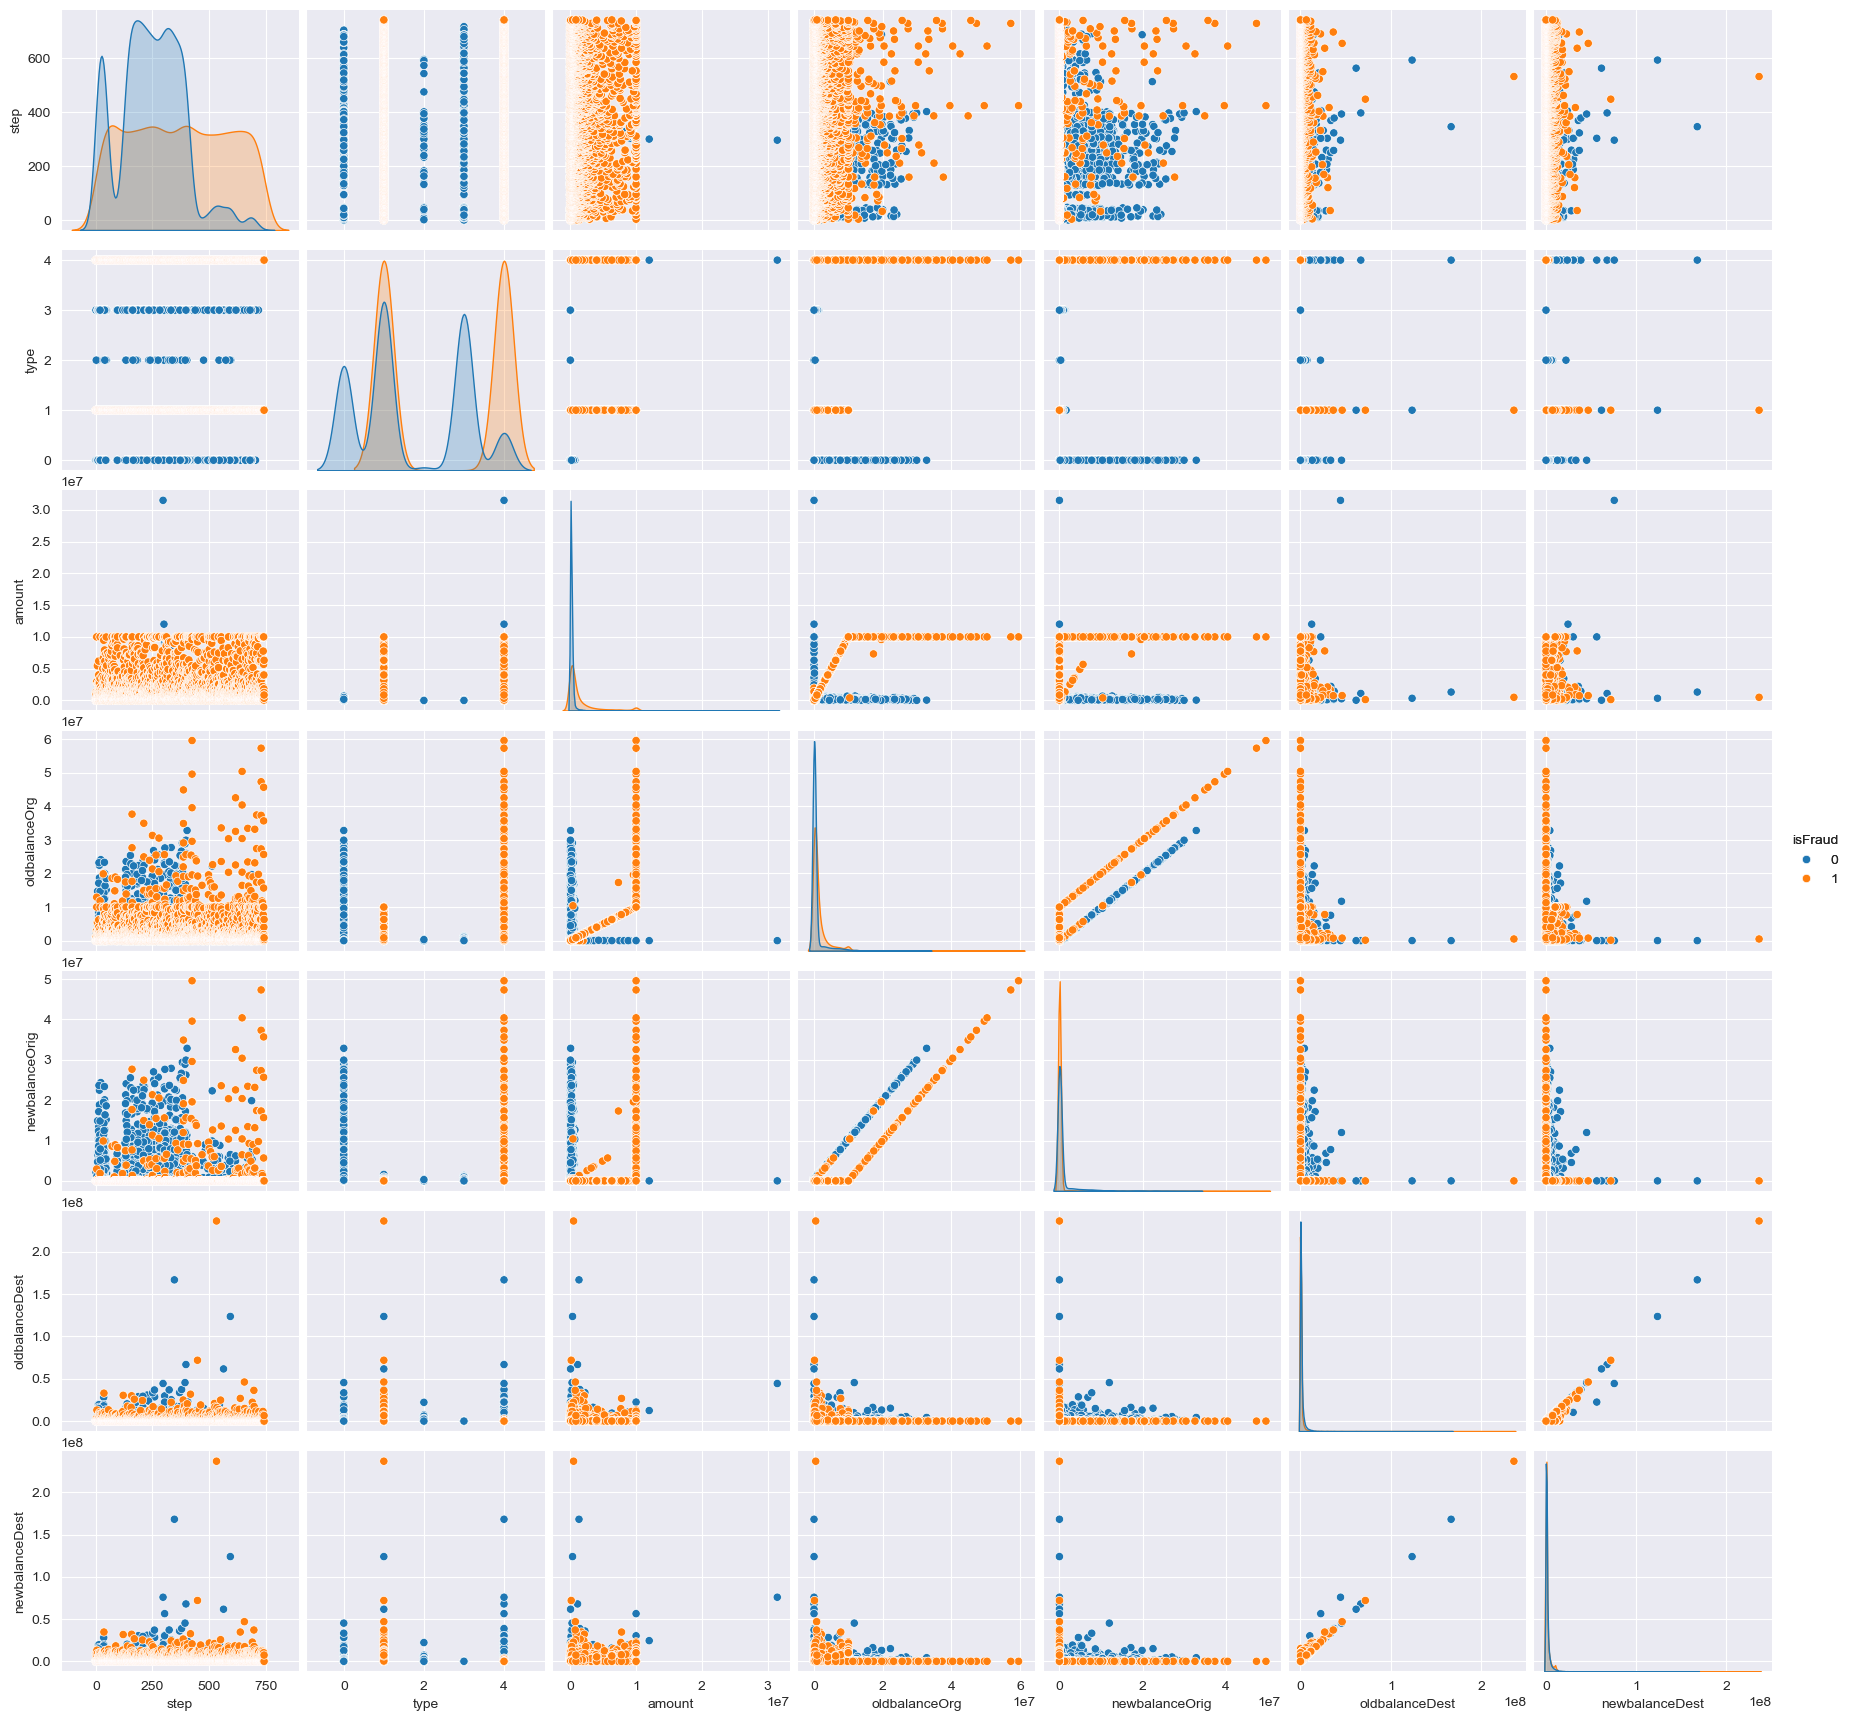

In [18]:
pp = sns.pairplot(Balanced_Data, hue = 'isFraud')
pp.add_legend()
plt.show()

In [19]:
#Balanced_Data.to_csv("Cleaned_Data.csv", index = True)

In [20]:
Cols = list(Balanced_Data.columns)

In [21]:
Balanced_Data = pd.get_dummies(Balanced_Data, columns= ['type'])

# Feature Scaling

We apply **StandardScaler** to standardize the features in **Vals**, ensuring that each feature has a mean of 0 and a standard deviation of 1.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
Scaler = StandardScaler()

In [24]:
Cols.remove('isFraud')
Cols.remove('type')

In [25]:
Balanced_Data[Cols] = Scaler.fit_transform(Balanced_Data[Cols])

In [26]:
Balanced_Data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_0,type_1,type_2,type_3,type_4
0,-0.746423,-0.343380,-0.374751,-0.210007,-0.128934,-0.177971,0,False,True,False,False,False
1,-0.875815,-0.442849,-0.380729,-0.210007,-0.238687,-0.324797,0,False,False,False,True,False
2,-0.658436,-0.441245,-0.374609,-0.203473,-0.238687,-0.324797,0,False,False,False,True,False
3,0.252488,-0.442201,-0.378951,-0.208390,-0.238687,-0.324797,0,False,False,False,True,False
4,0.247312,-0.305758,0.028855,0.421103,0.539686,0.312950,0,True,False,False,False,False


# Removing Outliers

We filter the scaled data (**T_data**) by removing any values with an absolute value greater than 3. This helps in removing potential outliers.

In [27]:
Balanced_Data[abs(Balanced_Data)<=3]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_0,type_1,type_2,type_3,type_4
0,-0.746423,-0.343380,-0.374751,-0.210007,-0.128934,-0.177971,0,False,True,False,False,False
1,-0.875815,-0.442849,-0.380729,-0.210007,-0.238687,-0.324797,0,False,False,False,True,False
2,-0.658436,-0.441245,-0.374609,-0.203473,-0.238687,-0.324797,0,False,False,False,True,False
3,0.252488,-0.442201,-0.378951,-0.208390,-0.238687,-0.324797,0,False,False,False,True,False
4,0.247312,-0.305758,0.028855,0.421103,0.539686,0.312950,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16421,2.260660,-0.258786,-0.276003,-0.210007,-0.238687,-0.236739,1,False,True,False,False,False
16422,2.260660,2.982084,1.565114,-0.210007,-0.238687,-0.324797,1,False,False,False,False,True
16423,2.260660,2.982084,1.565114,-0.210007,-0.219039,1.329111,1,False,True,False,False,False
16424,2.260660,0.018166,-0.118669,-0.210007,-0.238687,-0.324797,1,False,False,False,False,True


### Heatmap for Correlation in Balanced Data
- Visualizes the correlation matrix of features in the balanced dataset using a heatmap.
- Helps identify highly correlated variables and understand feature relationships.

### Dimensionality Reduction
- Removed unnecessary or less relevant features:
  - Dropped: `'oldbalanceOrg'`, `'type_2'`, `'type_1'`, `'oldbalanceDest'`, `'newbalanceDest'`, and `'type_3'`.
- Focused on retaining features that contribute most to the model's performance.

### Heatmap for Reduced Data
- Visualized the correlation matrix of the reduced dataset using a heatmap.
- Ensured the remaining features are minimally correlated and relevant for model training.


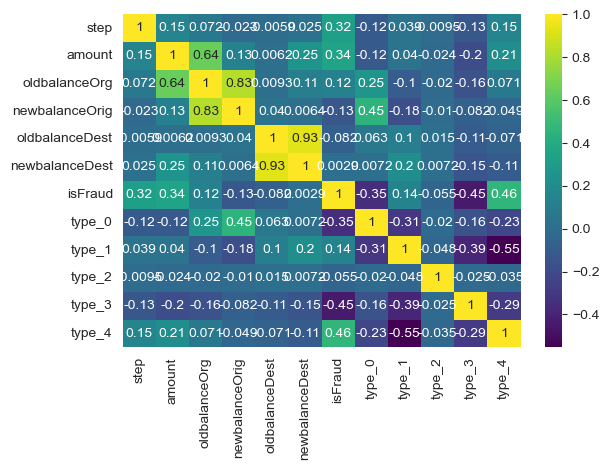

In [28]:
sns.heatmap(Balanced_Data.corr(), annot=True, cmap = 'viridis')
plt.tight_layout()
plt.show()

In [29]:
Reduced_Data = Balanced_Data.drop(['oldbalanceOrg','type_2','type_1','oldbalanceDest'], axis = 1)

In [30]:
Reduced_Data.drop(['newbalanceDest','type_3'],inplace = True, axis = 1)

<Axes: >

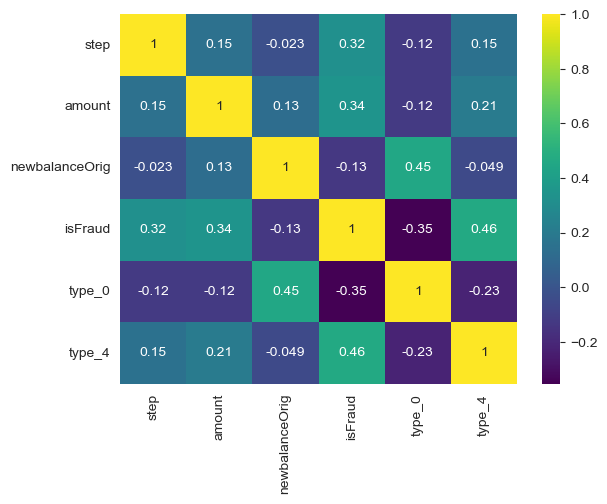

In [31]:
sns.heatmap(Reduced_Data.corr(), annot=True, cmap = 'viridis')

### Train-Test Split
- Split the reduced dataset into training and testing sets.
- Features (`X`) are all columns except `'isFraud'`.
- Target variable (`y`) is `'isFraud'`.
- Used an 80-20 split ratio, with 80% of the data allocated for training and 20% for testing.
- Set `random_state=42` to ensure reproducibility of results.


In [32]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(Reduced_Data.drop('isFraud',axis = 1),Reduced_Data['isFraud'] ,random_state = 42, test_size = 0.2)

### Model Selection and Training
- **Objective**: Select the best classification model based on cross-validation accuracy.

#### Models Evaluated:
1. Logistic Regression
2. Random Forest Classifier
3. XGBoost Classifier
4. Multi-Layer Perceptron Classifier (MLP)
   - Configured with `max_iter=1000` and `random_state=42` for stability.
5. Gaussian Naive Bayes

#### Process:
- Used `cross_val_score` with 5-fold cross-validation to evaluate each model's performance.
- Compared the mean accuracy of each model and selected the one with the highest score.

#### Best Model:
- Printed the name and accuracy of the best-performing model.
- Trained the selected model on the training data using the `fit` method.


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

def select_model(x_trn, y_trn):
    temp_model = None
    best = 0
    models = [LogisticRegression(), RandomForestClassifier(), XGBClassifier(), MLPClassifier(max_iter=1000, random_state=42), GaussianNB()]
    for model in models:
        score = cross_val_score(model, x_trn, y_trn, cv = 5, scoring='accuracy')
        mean = score.mean()
        print(f"{model.__class__.__name__}: Accuracy Mean = {mean}")
        if mean  > best:
            temp_model = model
            best = mean

    print(f"Best Model: {temp_model.__class__.__name__} with Mean Accuracy = {best}")
    return temp_model



In [68]:
Model = select_model(x_train, y_train)
Model.fit(x_train, y_train)

LogisticRegression: Accuracy Mean = 0.8309003415376619
RandomForestClassifier: Accuracy Mean = 0.8613607677172663
XGBClassifier: Accuracy Mean = 0.8729387088391432
MLPClassifier: Accuracy Mean = 0.8458259086015516
GaussianNB: Accuracy Mean = 0.6099895125663585
Best Model: XGBClassifier with Mean Accuracy = 0.8729387088391432


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Model Evaluation Metrics

#### Calculated Metrics:
- **Accuracy**: 0.89
- **Precision**: 0.89
- **Recall**: 0.87
- **F1-Score**: 0.88
- **AUC**: 0.96

#### ROC Curve:
The ROC curve shows the trade-off between True Positive Rate and False Positive Rate.

#### Confusion Matrix:
- **Confusion Matrix**:
- **Non-Fraud (0)** vs **Fraud (1)**:
- True Positives: 5729
- True Negatives: 5892
- False Positives: 685
- False Negatives: 822

#### Confusion Matrix Heatmap:
- The heatmap below visualizes the confusion matrix, with darker colors representing higher values.

---

The model shows strong performance with high accuracy, precision, recall, and AUC. The confusion matrix and ROC curve further demonstrate its effectiveness in distinguishing between non-fraud and fraud cases.


In [72]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,RocCurveDisplay
y_pred = Model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [73]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.8852071907373553
Precision: 0.8932023698160274
Recall: 0.8745229735918181
F1-Score: 0.8837639799460085


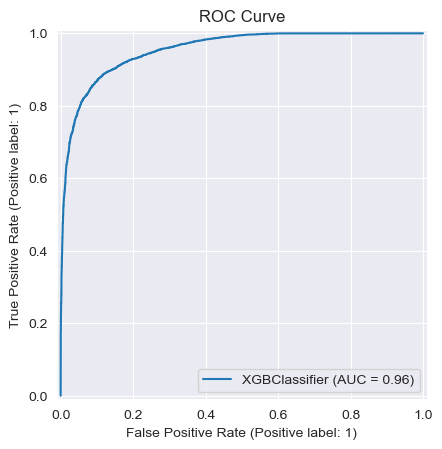

In [74]:
RocCurveDisplay.from_estimator(Model, x_test, y_test)
plt.title("ROC Curve")
plt.show()

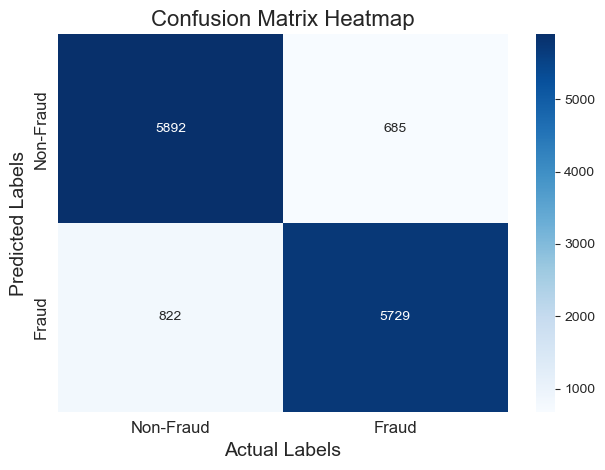

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual Labels', fontsize=14)
plt.ylabel('Predicted Labels', fontsize=14)
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.xticks([0.5, 1.5], ['Non-Fraud', 'Fraud'], fontsize=12)
plt.yticks([0.5, 1.5], ['Non-Fraud', 'Fraud'], fontsize=12)
plt.tight_layout()